# <span style= 'color: purple'> Spotify Data Analysis </span>


## <span style= 'color: purple'> Import Libraries And Data</span>

In [1]:
# importing libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,4)



# loading data

df_track = pd.read_csv(r'C:\Users\DELL LATITUDE E5470\Documents\Dataframe\Spotify dataset\tracks.csv')

df_artists = pd.read_csv(r'C:\Users\DELL LATITUDE E5470\Documents\Dataframe\Spotify dataset\artists.csv')

df_spotify_features = pd.read_csv(r'C:\Users\DELL LATITUDE E5470\Documents\Dataframe\Spotify dataset\SpotifyFeatures.csv')



## <span style= 'color: purple'> Data Exploration</span>

In this phase, I will be performing the following operation:

- Inspect the whole data.
- Convert columns to it's right data type to make analysis easy.
- Remove null values
- Organize data to make it easier to analyze.

### <span style= 'color: black'> Track Data </span>


In [2]:
# exploring data

df_track.head()


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [3]:
# checking the data information fo tracks data

df_track.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

**"release_date" column needs to be changed to a datetime data type.**

In [4]:
# checking for null values for track data

df_track.isnull().sum()


id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

**"name" column has 71 null values that needs to be dropped.**

In [5]:
# checking statistics of the dataframe for track data

df_track.describe()



,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [6]:
# viewing the total amount of rows and columns for track data

df_track.shape


(586672, 20)

**The dataframe has 20 columns and 586672 row of data.**

### <span style= 'color: black'> Artist Data </span>

In [7]:
# exploring data

df_artists.head()


,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [8]:
# checking the data information fo artist data

df_artists.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104349 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB


**All datatypes are correctly in their right format .**

In [9]:
# checking for null values for artists data

df_artists.isnull().sum()


id             0
followers     13
genres         0
name           0
popularity     0
dtype: int64

**"followers" column has 13 null values that needs to be dropped.**

In [10]:
# checking statistics of the dataframe

df_artists.describe()


,followers,popularity
count,1.104336e+06,1.104349e+06
mean,1.074304e+04,9.083884e+00
std,2.609554e+05,1.376310e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+01,0.000000e+00
50%,5.900000e+01,2.000000e+00
75%,4.510000e+02,1.400000e+01
max,7.890023e+07,1.000000e+02


In [11]:
# viewing the total amount of rows and columns

df_artists.shape


(1104349, 5)

**The dataframe has 5 columns and 1104349 row of data.**

### <span style= 'color: Black'> Spotify Features Data </span>

In [12]:
# exploring data

df_spotify_features.head()


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [13]:
# checking the data information

df_spotify_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

**All datatypes are correctly in their right format.**

In [14]:
# checking for null values

df_spotify_features.isnull().sum()


genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

**no null value found.**

In [15]:
# checking statistics of the dataframe

df_spotify_features.describe()


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [16]:
# viewing the total amount of rows and columns for track data

df_spotify_features.shape


(232725, 18)

**The dataframe has 18 columns and 232725 row of data.**

In [17]:
# counting each genre

pd.value_counts(df_spotify_features['genre'])


Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

**We have two children's music genre.**

## <span style= 'color: purple'> Data Cleaning</span>

### <span style= 'color: black'> Track Data </span>


I will start by cleaning the Track data then proceed to other dataset.

In [18]:
# changing datatype

df_track['release_date'] =  pd.to_datetime(df_track.release_date)



# checking datatype to confirm change

df_track.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586672 non-null  object        
 1   name              586601 non-null  object        
 2   popularity        586672 non-null  int64         
 3   duration_ms       586672 non-null  int64         
 4   explicit          586672 non-null  int64         
 5   artists           586672 non-null  object        
 6   id_artists        586672 non-null  object        
 7   release_date      586672 non-null  datetime64[ns]
 8   danceability      586672 non-null  float64       
 9   energy            586672 non-null  float64       
 10  key               586672 non-null  int64         
 11  loudness          586672 non-null  float64       
 12  mode              586672 non-null  int64         
 13  speechiness       586672 non-null  float64       
 14  acou

**"release_date" column has been converted to a datetime data type.**

In [19]:
# removing null values from track data

tracks= df_track.dropna(how = 'any')



# checking datatype to confirm change

tracks.isnull().sum()


id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

**Null values have successfully been dropped from the "name" column.**

In [20]:
# converting song duration from milliseconds to seconds in a new column

tracks['duration']= tracks['duration_ms'].apply(lambda x: round(x/1000))


C:\Users\DELL LATITUDE E5470\AppData\Local\Temp\ipykernel_16248\3586188805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks['duration']= tracks['duration_ms'].apply(lambda x: round(x/1000))


**"duration_ms" column has been converted from milliseconds to seconds in a new column called "duration".**

In [21]:
# removing the "duration_ms" column

tracks.drop( ['duration_ms'], inplace= True, axis= 1)



# checking datatype to confirm change

tracks.head()


C:\Users\DELL LATITUDE E5470\AppData\Local\Temp\ipykernel_16248\2360464273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks.drop( ['duration_ms'], inplace= True, axis= 1)


,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
0,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,127
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,98
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,182
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,177
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,163


**"duration_ms" column has been removed from the dataframe.**

### <span style= 'color: black'> Artist Data </span>

I need to clean the Artist data then proceed to the last dataset.

In [22]:
# removing null values from artists data

artists= df_artists.dropna(how = 'any')



# checking datatype to confirm change

artists.isnull().sum()


id            0
followers     0
genres        0
name          0
popularity    0
dtype: int64

**Null values have successfully been dropped.**

### <span style= 'color: black'> Spotify Feature Data </span>

I need to clean the Spotify Feature data then proceed to analyze data.

In [23]:
# dropping the two children's genre

sf= ['Children’s Music', "Children's Music"]
spotify_features= df_spotify_features[~df_spotify_features.genre.isin(sf)]


**The two Children’s Music genres have successfully been dropped.**

In [24]:
# converting song duration from milliseconds to seconds in a new column

spotify_features['duration']= spotify_features['duration_ms'].apply(lambda x: round(x/1000))


C:\Users\DELL LATITUDE E5470\AppData\Local\Temp\ipykernel_16248\1877723188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_features['duration']= spotify_features['duration_ms'].apply(lambda x: round(x/1000))


In [25]:
# removing the "duration_ms" column

spotify_features.drop( ['duration_ms'], inplace= True, axis= 1)



# checking datatype to confirm change

spotify_features.head()

C:\Users\DELL LATITUDE E5470\AppData\Local\Temp\ipykernel_16248\2991974680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_features.drop( ['duration_ms'], inplace= True, axis= 1)


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,99
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,137
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,170
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,152
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,83


**"duration_ms" column has been removed from the dataframe.**

## <span style= 'color: purple'> ANALYSIS </span>

### <span style= 'color: black'> Track Data </span>



In [26]:
# sorting popularity column to find most popular

most_popular= tracks.sort_values('popularity',ascending = False)

most_popular= most_popular[:10]
most_popular


,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4,198
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4,242
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4,133
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4,160
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4,216
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4,242
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,200
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4,164
93806,7Bk0uXKk1uPT0XuQbpFzvs,Fiel,94,0,"['Los Legendarios', 'Wisin', 'Jhay Cortez']","['0n6sKrG0xKAf8xmdqeNGke', '3E6xrwgnVfYCrCs0eP...",2021-02-04,0.849,0.701,6,-4.407,0,0.0600,0.40700,0.000000,0.1120,0.505,98.005,4,262
92819,1xK1Gg9SxG8fy2Ya373oqb,Bandido,94,0,"['Myke Towers', 'Juhn']","['7iK8PXO48WeuP03g8YR51W', '2LmcxBak1alK1bf7d1...",2020-12-10,0.713,0.617,8,-4.637,1,0.0887,0.12200,0.000000,0.0962,0.682,168.021,4,233


In [27]:
# sorting popularity column to find least popular

least_popular= tracks.sort_values('popularity', ascending= True)

least_popular[:10]


,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
134528,2hV7SShXsBeomXtpd53QNh,You and the night and the music,0,0,"['Libby Holman & Her Orchestra', 'Libby Holman']","['1BJcpnHvZBZSgUBEch0utn', '08czVWdmLSEES9nLc4...",1934-01-01,0.306,0.171,4,-16.752,0,0.0374,0.981,0.000002,0.3720,0.352,127.261,5,168
132451,2heB3jEdRgx83180axN3cd,Roses of Picardy,0,0,['Paul Specht'],['1tCrPspkGQyLDhWFmTZanI'],1923-01-01,0.324,0.495,5,-14.571,1,0.0336,0.978,0.760000,0.4060,0.702,207.380,4,163
132450,2ew5dyayICmi1B9DHhQhEh,I'm the last of the red hot mamas,0,0,['Sophie Tucker'],['58nEgrqod6YO5ZATASjIQ8'],1923-01-01,0.607,0.319,0,-15.191,1,0.3580,0.996,0.577000,0.6640,0.795,84.080,4,118
132449,2baUvPSWFyxIkSUECmghxC,Snakes hips,0,0,['The Georgians'],['58LQXzq5kNsvPQdviB4ZyL'],1923-01-01,0.640,0.541,3,-7.905,1,0.0384,0.996,0.879000,0.0853,0.844,98.589,4,190
132448,2ZTaPJ3LuOz4DC6nnoeTEv,The man I love,0,0,"['Sophie Tucker', 'Miff Mole']","['58nEgrqod6YO5ZATASjIQ8', '1WZqArTg7JOsXScvGF...",1923-01-01,0.487,0.163,8,-15.863,1,0.0449,0.992,0.000041,0.0702,0.502,109.412,5,173
132447,2Rfr8KkJOYpir4uaTKrowo,I'll Have Vanilla,0,0,['Eddie Cantor'],['2pDFdLHKOmzKiNDzkz7p8L'],1923-01-01,0.636,0.326,0,-11.082,0,0.0462,0.983,0.000010,0.3880,0.673,110.490,4,192
132446,2PQzuSpu8fyEIm1RWafECX,Little Curly Hair In a High Chair,0,0,"['Jerry Joyce', 'Eddie Cantor']","['1t8J6SE9IOemeQWADZZSax', '2pDFdLHKOmzKiNDzkz...",1923-01-01,0.325,0.152,6,-15.167,1,0.0390,0.988,0.009300,0.4240,0.320,87.750,4,193
132445,2Oea70hSqLAgTYVZkHIvBW,The Grass Grows Greener,0,0,['Paul Specht'],['1tCrPspkGQyLDhWFmTZanI'],1923-01-01,0.564,0.423,10,-9.269,1,0.2990,0.994,0.062700,0.2300,0.683,206.289,4,195
132444,2NdFpF9VzMiXIB5FFhFgTb,Savannah,0,0,['The Georgians'],['58LQXzq5kNsvPQdviB4ZyL'],1923-01-01,0.580,0.577,5,-7.879,1,0.0390,0.995,0.877000,0.1100,0.664,98.528,4,205
132443,2I6KmLYGf0C0Xz7UGWlE6D,Barney google,0,0,['The Georgians'],['58LQXzq5kNsvPQdviB4ZyL'],1923-01-01,0.685,0.481,7,-7.628,1,0.0387,0.996,0.888000,0.3420,0.859,106.601,4,177


In [28]:
# extracting the years in the release_date column for visualization

years= tracks.release_date.dt.year


In [29]:
genre= spotify_features['genre']

In [30]:
# creating a new metric for proper visuals

sample_track= tracks.sample(int(0.004*len(tracks)))


### <span style= 'color: black'> Artist Data </span>


In [31]:
# sorting followers column to find most followed artist

most_followers= artists.sort_values('followers', ascending= False)

most_followers= most_followers[:10]

most_followers


,id,followers,genres,name,popularity
144138,6eUKZXaKkcviH0Ku9w2n3V,78900234.0,"['pop', 'uk pop']",Ed Sheeran,92
144485,66CXWjxzNUsdJxJ2JdwvnR,61301006.0,"['pop', 'post-teen pop']",Ariana Grande,95
313676,3TVXtAsR1Inumwj472S9r4,54416812.0,"['canadian hip hop', 'canadian pop', 'hip hop'...",Drake,98
144481,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100
144488,7dGJo4pcD2V6oG8kP0tJRR,43747833.0,"['detroit hip hop', 'hip hop', 'rap']",Eminem,94
313508,5pKCCKE2ajJHZ9KAiaK11H,42244011.0,"['barbadian pop', 'dance pop', 'pop', 'post-te...",Rihanna,92
126658,6qqNVTkY8uBg9cP3Jd7DAH,41792604.0,"['electropop', 'pop']",Billie Eilish,92
126338,06HL4z0CvFAxyc27GXpf02,38869193.0,"['pop', 'post-teen pop']",Taylor Swift,98
126339,53XhwfbYqKCa1cC15pYq2q,33665795.0,"['modern rock', 'rock']",Imagine Dragons,89
144496,1dfeR4HaWDbWqFHLkxsg1d,33483326.0,"['classic rock', 'glam rock', 'rock']",Queen,89


### <span style= 'color: black'> Spotify Feature Data </span>


In [32]:
#counting the number of each genre

count_genre = pd.value_counts(spotify_features['genre'])
df= pd.DataFrame(data= count_genre, columns=['genre', 'frequency'])



In [33]:
#sorting dataframe according popularity

famous= spotify_features.sort_values('popularity', ascending= False)


## <span style= 'color: purple'> VISUALIZATION </span>

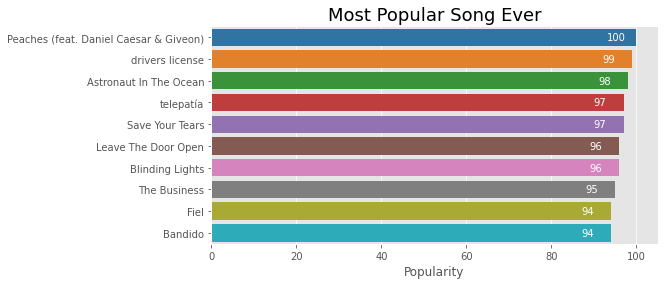

In [34]:
# plotting barchart for the most popular songs

plt.subplots(figsize=(8, 4))

g= sns.barplot(x= 'popularity', y='name', data= most_popular, palette= 'tab10')
plt.title('Most Popular Song Ever', size= 18)
plt.ylabel(None)
plt.xlabel('Popularity', size=12)


# adding labels to each bar

rects = g.patches

for rect in rects:
    
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    
    space = -30
    
    ha = 'left'

    
    if x_value < 0:
        
        space *= -1
        
        ha = 'right'

    
    label = '{:,.0f}'.format(x_value)

    
    
# create annotation

    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords='offset points', 
        va='center',                
        ha=ha,                      
        color = 'white')  


**Peaches is the most popular song in the world on Spotify.** 

Text(0.5, 1.0, 'Correlation Between Data')

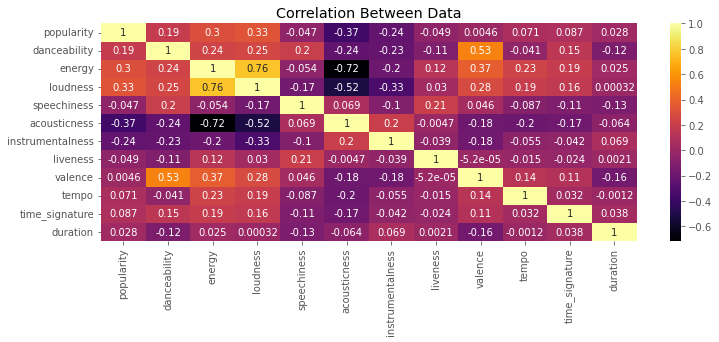

In [35]:
# checking correlation between each columns

track_corr= tracks.drop(['key', 'mode', 'explicit'], axis= 1).corr(method= 'pearson')

sns.heatmap(track_corr, annot=True, cmap= 'inferno')
plt.title('Correlation Between Data')


**Good correlation between; Energy & Loundess, Dancebility & Valence.**


Text(0.5, 0, 'Loudness')

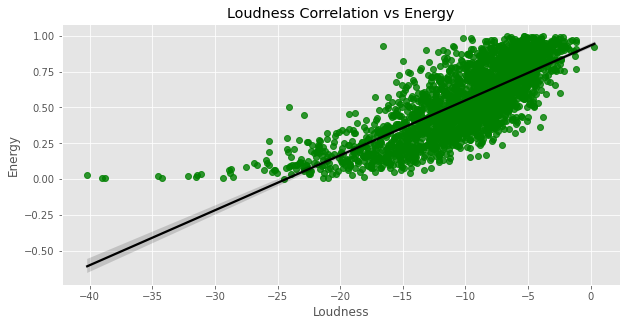

In [36]:
# plotting Loudness vs Energy using seaborn

plt.figure(figsize=(10,4.8))
sns.regplot(x= 'loudness', y='energy', data=sample_track, scatter_kws={'color': 'green'}, line_kws={'color': 'black'}).set(title = 'Loudness Correlation vs Energy')
plt.ylabel("Energy", size=12)
plt.xlabel("Loudness", size=12)


**Songs with high energy often have high loudness.** 

Text(0.5, 0, 'Valence')

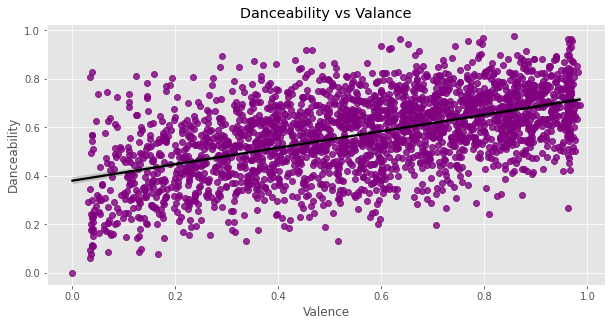

In [37]:
# plotting Loudness vs Energy using seaborn

plt.figure(figsize=(10,4.8))
sns.regplot(x= 'valence', y='danceability', data=sample_track, scatter_kws={'color': 'purple'}, line_kws={'color': 'black'}).set(title = 'Danceability vs Valance')
plt.ylabel('Danceability', size=12)
plt.xlabel('Valence', size=12)


**Songs with high danceability mostly have high valence.** 

Text(0.5, 0, 'Acousticness')

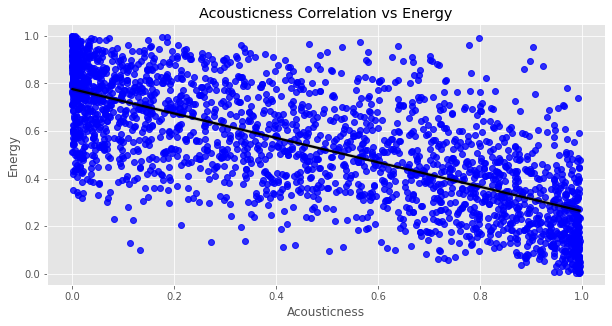

In [38]:
# plotting Loudness vs Energy using seaborn

plt.figure(figsize=(10,4.8))
sns.regplot(x= 'acousticness', y='energy', data=sample_track, scatter_kws={'color': 'blue'}, line_kws={'color': 'black'}).set(title = 'Acousticness Correlation vs Energy')
plt.ylabel('Energy', size=12)
plt.xlabel('Acousticness', size=12)


**Songs with high energy often have low acouticness.** 

Text(0.5, 0, 'Acousticness')

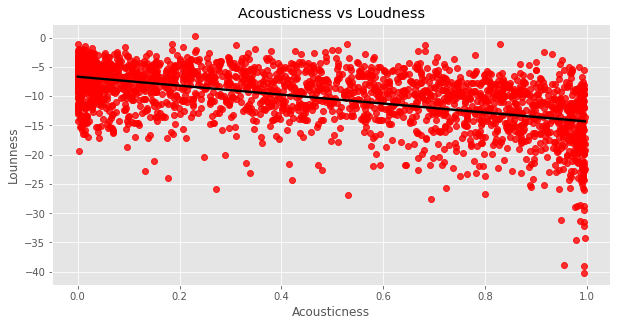

In [39]:
# plotting Loudness vs Energy using seaborn

plt.figure(figsize=(10,4.8))
sns.regplot(x= 'acousticness', y='loudness', data=sample_track, scatter_kws={'color': 'red'}, line_kws={'color': 'black'}).set(title = 'Acousticness vs Loudness')
plt.ylabel('Lounness', size=12)
plt.xlabel('Acousticness', size=12)


**Songs with high loudness often have low acousticness.** 

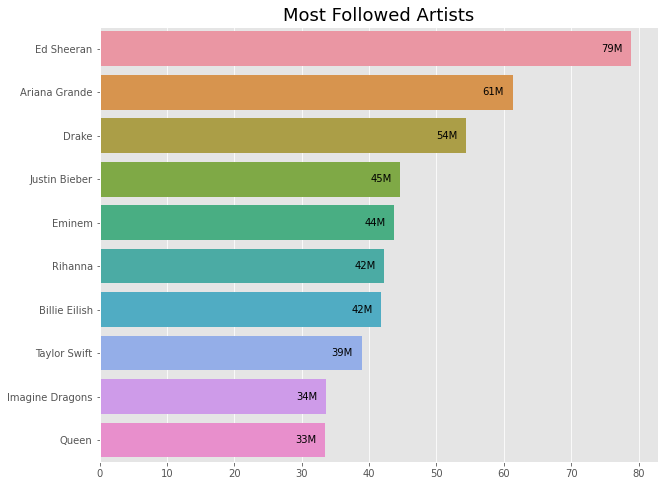

In [41]:
# adding Labels to the graph
followers= artists['followers']/1000000
plt.figure(figsize=(10, 8))
ax= sns.barplot(x= followers, y='name', data= most_followers)
plt.ylabel(None)
plt.xlabel(None)
plt.title('Most Followed Artists', size=18)


rects = ax.patches

for rect in rects:
    
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    
    space = -30
    
    ha = 'left'

    
    if x_value < 0:
        
        space *= -1
        
        ha = 'right'

    
    label = '{:,.0f}'.format(x_value)

    

# create annotation

    plt.annotate(
        label+"M",                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords='offset points', 
        va='center',                
        ha=ha,                      
        color = 'black' )
    
    
    
    

**Ed Sheeran is the most followed artist on the platform.** 

Text(0.5, 6.79999999999999, 'Years')

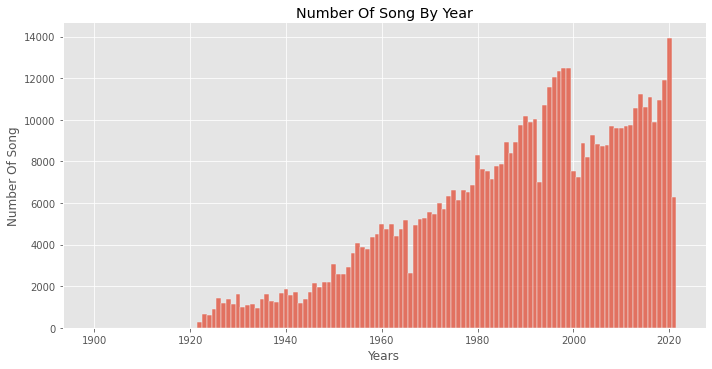

In [42]:
# plotting graph for number of song per year

sns.displot(years,discrete= True, aspect= 2, height= 5, kind= 'hist')
plt.title('Number Of Song By Year')
plt.ylabel('Number Of Song', size=12)
plt.xlabel('Years', size=12)


**Number of songs increased rapidly over the years.** 

Text(0.5, 0, 'Years')

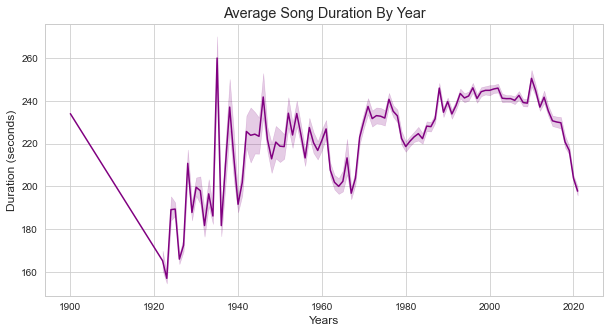

In [43]:
# plotting graph for year vs duration

total_duration= tracks.duration
sns.set_style(style= 'whitegrid')
fig, ax=plt.subplots(figsize= (10,5))
fig= sns.lineplot(x= years, y= total_duration, ax=ax,color= "purple")
plt.title( 'Average Song Duration By Year')
plt.ylabel("Duration (seconds)", size=12)
plt.xlabel("Years", size=12)


**The duration of songs has dropped lately.** 

Text(0.5, 0, 'Duration (seconds)')

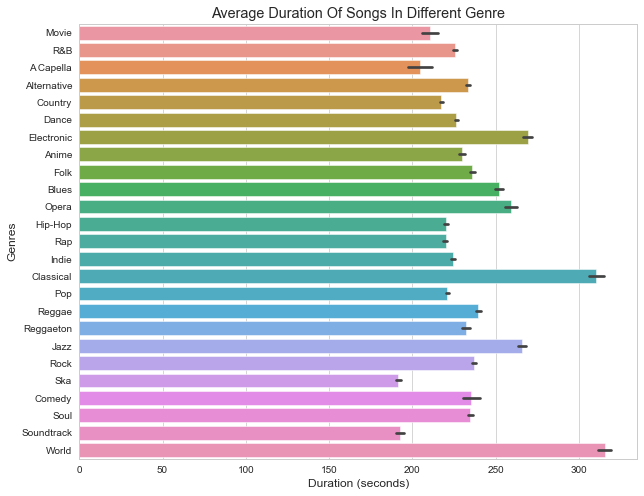

In [44]:
# plotting graph for duration of the songs in different genre

plt.figure(figsize=(10, 8))
sns.barplot(y= 'genre', x= 'duration', data= spotify_features)
plt.title('Average Duration Of Songs In Different Genre')
plt.ylabel('Genres', size=12)
plt.xlabel('Duration (seconds)', size=12)


**Classical and World musical genre have the longest song duration.**

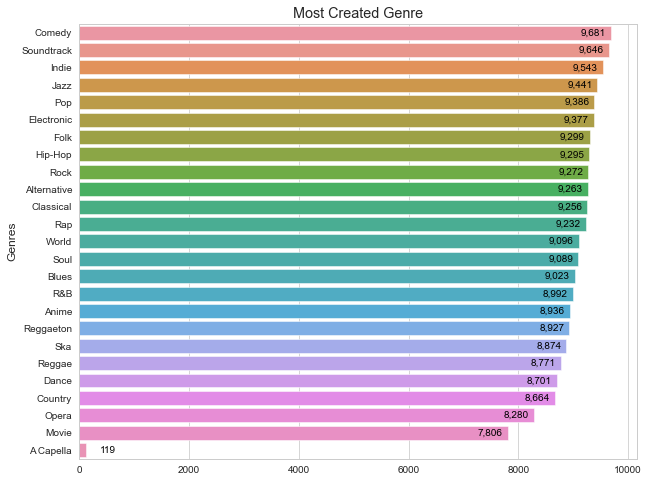

In [45]:
# plotting graph for the most created genre

plt.figure(figsize=(10, 8))
ax= sns.barplot(y= df.index, x= 'genre', data= df)
plt.title('Most Created Genre')
plt.ylabel('Genres', size=12)
plt.xlabel(None)



# adding annotations

rects = ax.patches

for rect in rects:
    
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    
    space = -30
    
    ha = 'left'

    
    if x_value < 120:
        
        space *= -1
        
        ha = 'right'

    
    label = '{:,.0f}'.format(x_value)
    
    
    
# create annotation
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords='offset points', 
        va='center',                
        ha=ha,                      
        color = 'black')  
    

**The genre of song created the most is comedy music.**

Text(0.5, 0, 'Popularity')

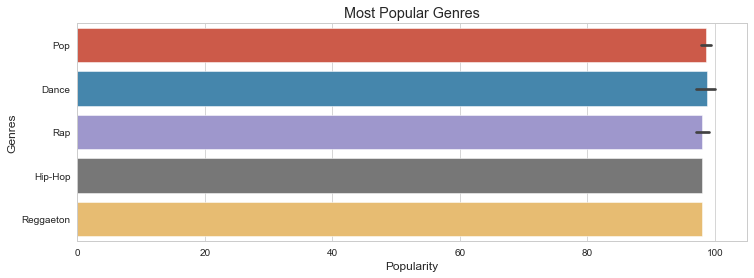

In [46]:
# plotting graph for the most popular genre

sns.barplot(y= 'genre', x= 'popularity', data= famous.head(12))
plt.title('Most Popular Genres')
plt.ylabel('Genres', size=12)
plt.xlabel('Popularity', size=12)


**Dance is the most popular genre.**

### Key Insights
- Peaches by Justin Bieber is the most popular song on Spotify.
- Ed Sheeran is the most followed artist on the platform.
- Dance is the most popular genre.
- The Number of songs released increased rapidly over the years.
- Song duration has dropped lately.
- Classical and World musical genre have the longest song duration.
- Good correlation between; Energy & Loundess, Dancebility & Valence